In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [5]:
train_file_path = 'train.csv'
test_file_path = 'test.csv'
train_raw = pd.read_csv(train_file_path)
test_raw = pd.read_csv(test_file_path)

In [6]:
train_raw.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
column_names = ['in_out', 'latitude', 'longitude',
                '6~7_ride', '7~8_ride', '8~9_ride',
                '9~10_ride', '10~11_ride', '11~12_ride',
                '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
                '9~10_takeoff', '10~11_takeoff', '18~20_ride']

raw_dataset = pd.read_csv(train_file_path, usecols=column_names,
                          na_values='?', skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.tail()

,in_out,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,18~20_ride
415418,시내,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,시내,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,시내,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
415421,시내,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415422,시내,33.24873,126.50799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [13]:
dataset.isna().sum()

in_out           0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
18~20_ride       0
dtype: int64

In [14]:
in_out = dataset.pop('in_out')

In [15]:
dataset['in'] = (in_out == '시내')*1.0
dataset['out'] = (in_out == '시외')*1.0
dataset.tail()

,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,18~20_ride,in,out
415418,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415419,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415420,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
415421,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415422,33.24873,126.50799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0


In [20]:
dataset = dataset.astype('float32')

In [21]:
train_dataset = dataset.sample(frac=0.8)
test_dataset = dataset.drop(train_dataset.index)

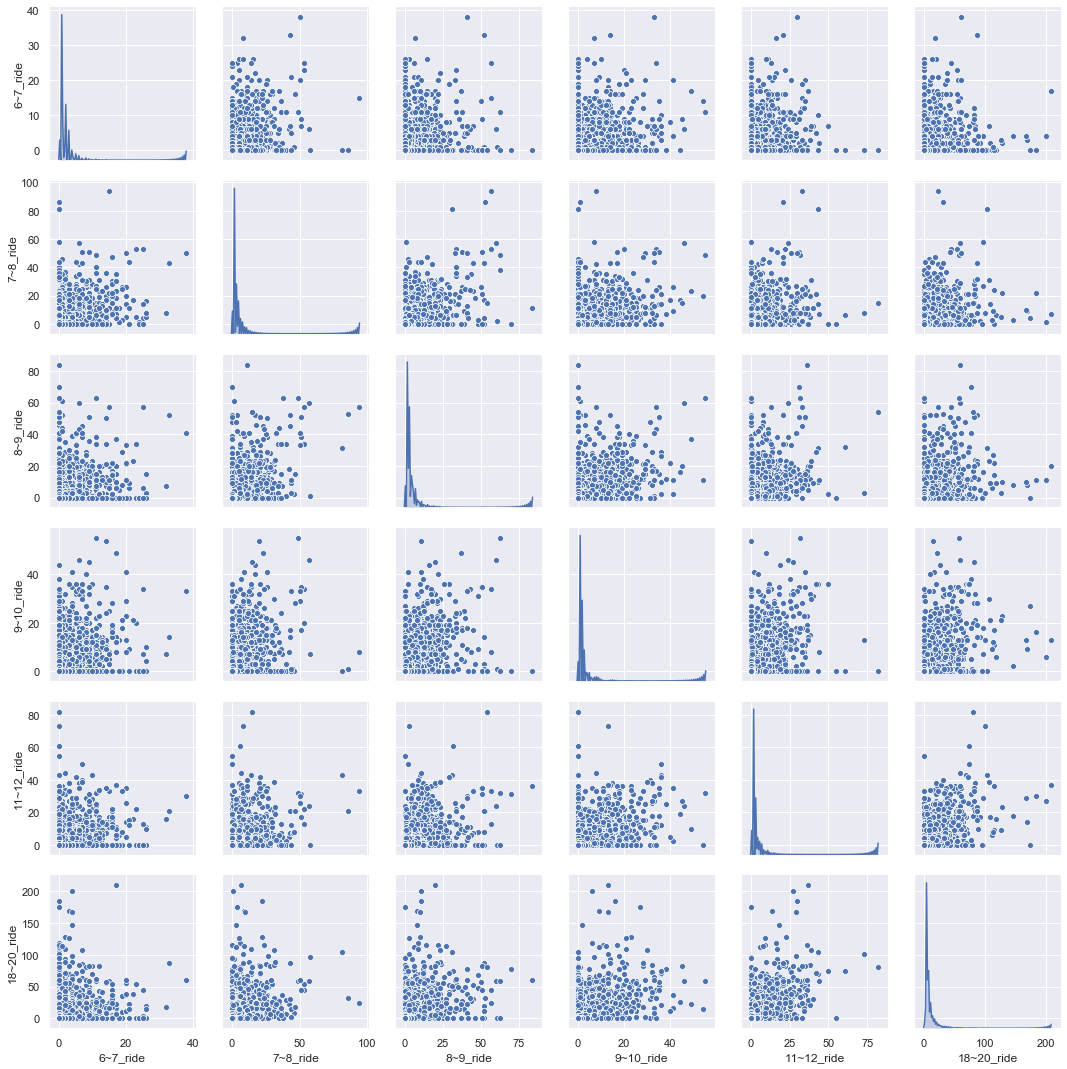

In [23]:
sns.pairplot(test_dataset[['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
                            '11~12_ride', '18~20_ride']], diag_kind='kde')

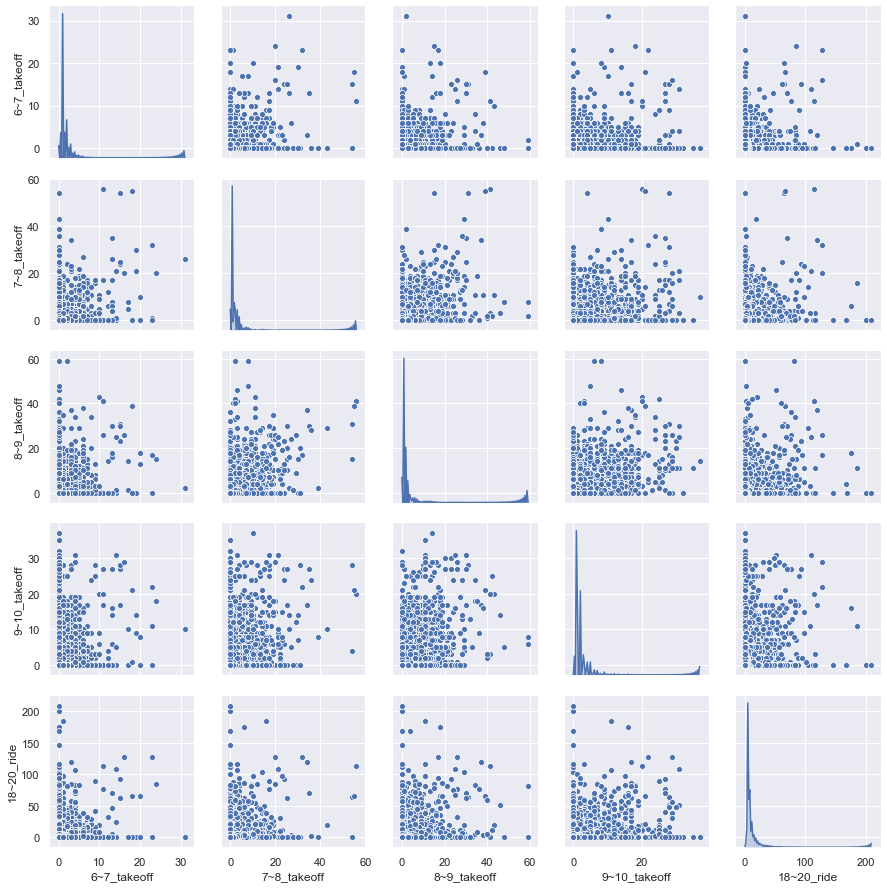

In [25]:
sns.pairplot(test_dataset[['6~7_takeoff', '7~8_takeoff', '8~9_takeoff', '9~10_takeoff',
                           '18~20_ride']], diag_kind='kde')

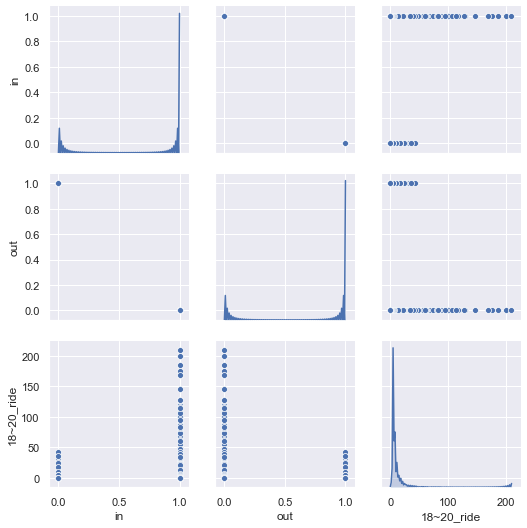

In [26]:
sns.pairplot(test_dataset[['in', 'out',
                           '18~20_ride']], diag_kind='kde')

In [28]:
train_stats = train_dataset.describe()
train_stats.pop('18~20_ride')
train_stats.pop('in')
train_stats.pop('out')
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
latitude,332338.0,33.392796,0.111525,33.208351,33.290081,33.478851,33.500019,33.963638
longitude,332338.0,126.635063,0.173821,126.165039,126.475777,126.529770,126.575890,126.965668
6~7_ride,332338.0,0.305135,1.114254,0.000000,0.000000,0.000000,0.000000,85.000000
7~8_ride,332338.0,0.826315,2.249023,0.000000,0.000000,0.000000,1.000000,89.000000
8~9_ride,332338.0,0.817021,2.323862,0.000000,0.000000,0.000000,1.000000,136.000000
9~10_ride,332338.0,0.645671,1.984662,0.000000,0.000000,0.000000,1.000000,78.000000
10~11_ride,332338.0,0.600590,1.892881,0.000000,0.000000,0.000000,0.000000,98.000000
11~12_ride,332338.0,0.580590,1.953798,0.000000,0.000000,0.000000,0.000000,99.000000
6~7_takeoff,332338.0,0.112975,0.598708,0.000000,0.000000,0.000000,0.000000,45.000000
7~8_takeoff,332338.0,0.343355,1.266503,0.000000,0.000000,0.000000,0.000000,66.000000


In [29]:
train_labels = train_dataset.pop('18~20_ride')
test_labels = test_dataset.pop('18~20_ride')

In [35]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

numeric_columns = [
    'latitude', 'longitude',
    '6~7_ride', '7~8_ride', '8~9_ride',
    '9~10_ride', '10~11_ride', '11~12_ride',
    '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
    '9~10_takeoff', '10~11_takeoff'
]

categorical_columns = ['in', 'out']

normed_train_data = norm(train_dataset[numeric_columns])
normed_train_data[categorical_columns] = train_dataset[categorical_columns]
normed_test_data = norm(test_dataset[numeric_columns])
normed_test_data[categorical_columns] = test_dataset[categorical_columns]

In [36]:
normed_train_data.tail()

,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,in,out
413000,0.721414,-0.753191,-0.273847,0.966502,0.078739,-0.325331,-0.317289,-0.297159,-0.188699,-0.271105,-0.312532,-0.288667,-0.289258,1.0,0.0
155986,-1.373836,-0.690601,-0.273847,0.521864,-0.351579,-0.325331,-0.317289,0.214664,-0.188699,-0.271105,-0.312532,-0.288667,-0.289258,1.0,0.0
206319,-1.064214,0.123030,-0.273847,0.521864,0.078739,-0.325331,-0.317289,-0.297159,-0.188699,-0.271105,-0.312532,-0.288667,-0.289258,1.0,0.0
141534,-1.075947,-0.221744,-0.273847,-0.367411,-0.351579,-0.325331,-0.317289,0.214664,-0.188699,-0.271105,-0.312532,-0.288667,-0.289258,1.0,0.0
264871,1.140696,-0.361058,-0.273847,-0.367411,-0.351579,0.178534,-0.317289,-0.297159,-0.188699,-0.271105,-0.312532,-0.288667,-0.289258,1.0,0.0


In [37]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mae', 'mse']
)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 셔플은 왜?
# train_dataset = train_dataset.shuffle(500)

In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


In [42]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')


..............................

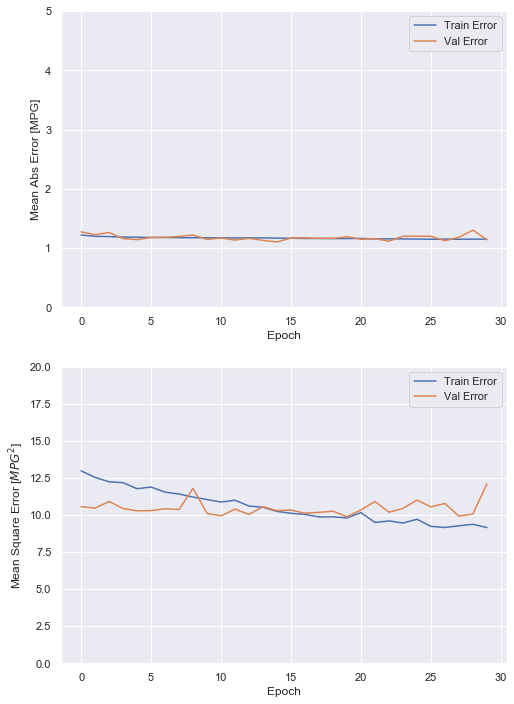

In [43]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

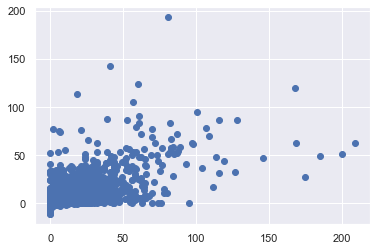

In [45]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)

In [46]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

83085/83085 - 4s - loss: 10.8690 - mae: 1.1359 - mse: 10.8690
테스트 세트의 평균 절대 오차:  1.14 MPG
